In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import sample, choice
%matplotlib inline

In [71]:
data = pd.read_excel (r'/Users/Oscar/Documents/Research/GW190521_Mass_Distribution.xlsx' ,sheet_name="Distributions" , engine='openpyxl')
df = pd.DataFrame(data)


In [72]:
M11 = df['M11']
M12 = df['M12']

M1 = df['M1']
M1weight = df['M1_W']

In [29]:
M11Random = []
M12Random = []

for _ in range(2000):
    selection = choice(M11)
    M11Random += [selection]
    
for _ in range(2000):
    selection2 = choice(M12)
    M12Random += [selection2]

In [31]:
#Mrem formula
def Mrem(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    MSum3 = mass1 + mass2
    n3 = (mass1 * mass2) / MSum3 
    dm3 = (mass1 - mass2) / MSum3
    Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
    return Mrem_Mass

In [111]:
M1_Rebuilt = Mrem(np.array(M11Random),np.array(M12Random))

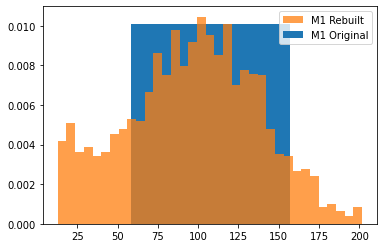

In [134]:
plt.hist(M1, bins = 100, color = 'C0', density = True)
plt.hist(M1_Rebuilt, bins = 35, histtype = 'stepfilled', color = 'C1', density = True,alpha = 0.75)
plt.legend(labels = ['M1 Rebuilt','M1 Original'])
plt.show()

In [112]:
xy = (M11Random, M12Random, M1_Rebuilt)

df = pd.DataFrame(xy).T
df.to_excel(excel_writer = "/Users/Oscar/Documents/Research/xy.xlsx") 

In [115]:
data = pd.read_excel (r'/Users/Oscar/Documents/Research/GW190521_Mass_Distribution.xlsx' ,sheet_name="Check" , engine='openpyxl')
df = pd.DataFrame(data)

M11R = df['M11R']
M12R = df['M12R']
M1R = df['M1R']
M1RWeight = df['M1RWeight']

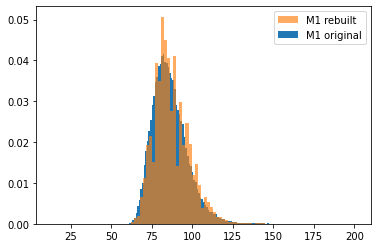

In [133]:
plt.hist(M1, bins = 100, color = 'C0', density = True, weights = M1weight)
plt.hist(M1R, bins = 100, weights = M1RWeight, color = 'C1', density = True, alpha = 0.65, histtype = 'stepfilled')
plt.legend(labels = ['M1 rebuilt','M1 original'])
plt.show()